In [20]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec 20 18:05:41 2020

@author: mayur
"""
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.initializers import he_uniform

#print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize
train_images = train_images / 255.0
test_images = test_images / 255.0

x_train = train_images.reshape((train_images.shape[0],train_images.shape[1],train_images.shape[2], 1))
x_test = test_images.reshape((test_images.shape[0],test_images.shape[1], test_images.shape[2], 1))
x_train.shape
# MODEL
n_classes = len(np.unique(train_labels))
in_shape = x_train.shape[1:]

model = Sequential()
model.add(Conv2D(256,(3,3),activation='relu',input_shape=in_shape,kernel_initializer='random_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='random_normal'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1000, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.2))
model.add(Dense(1000, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6647 - accuracy: 0.7527
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3314 - accuracy: 0.8776
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2871 - accuracy: 0.8947
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2597 - accuracy: 0.9046
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2362 - accuracy: 0.9108
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2282 - accuracy: 0.9162
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2186 - accuracy: 0.9195
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2023 - accuracy: 0.9263
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1869 - accuracy: 0.9322
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [21]:
model.fit(x_train, train_labels, epochs=20, batch_size=32, verbose=1)

test_loss, test_acc = model.evaluate(x_test,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1767 - accuracy: 0.9344
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1786 - accuracy: 0.9356
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1659 - accuracy: 0.9407
Epoch 4/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1639 - accuracy: 0.9408
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1644 - accuracy: 0.9410
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1526 - accuracy: 0.9462
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1521 - accuracy: 0.9461
Epoch 8/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1537 - accuracy: 0.9457
Epoch 9/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1432 - accuracy: 0.9485
Epoch 10/20
1875/1875 [==============================] - 14s 7ms/step - l

In [ ]:
predictions = model.predict(x_test.reshape(10000,28,28,1))

for i in range(10): 
  plt.figure()
  plt.imshow(train_images[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print(class_names[np.argmax(predictions[i])])

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

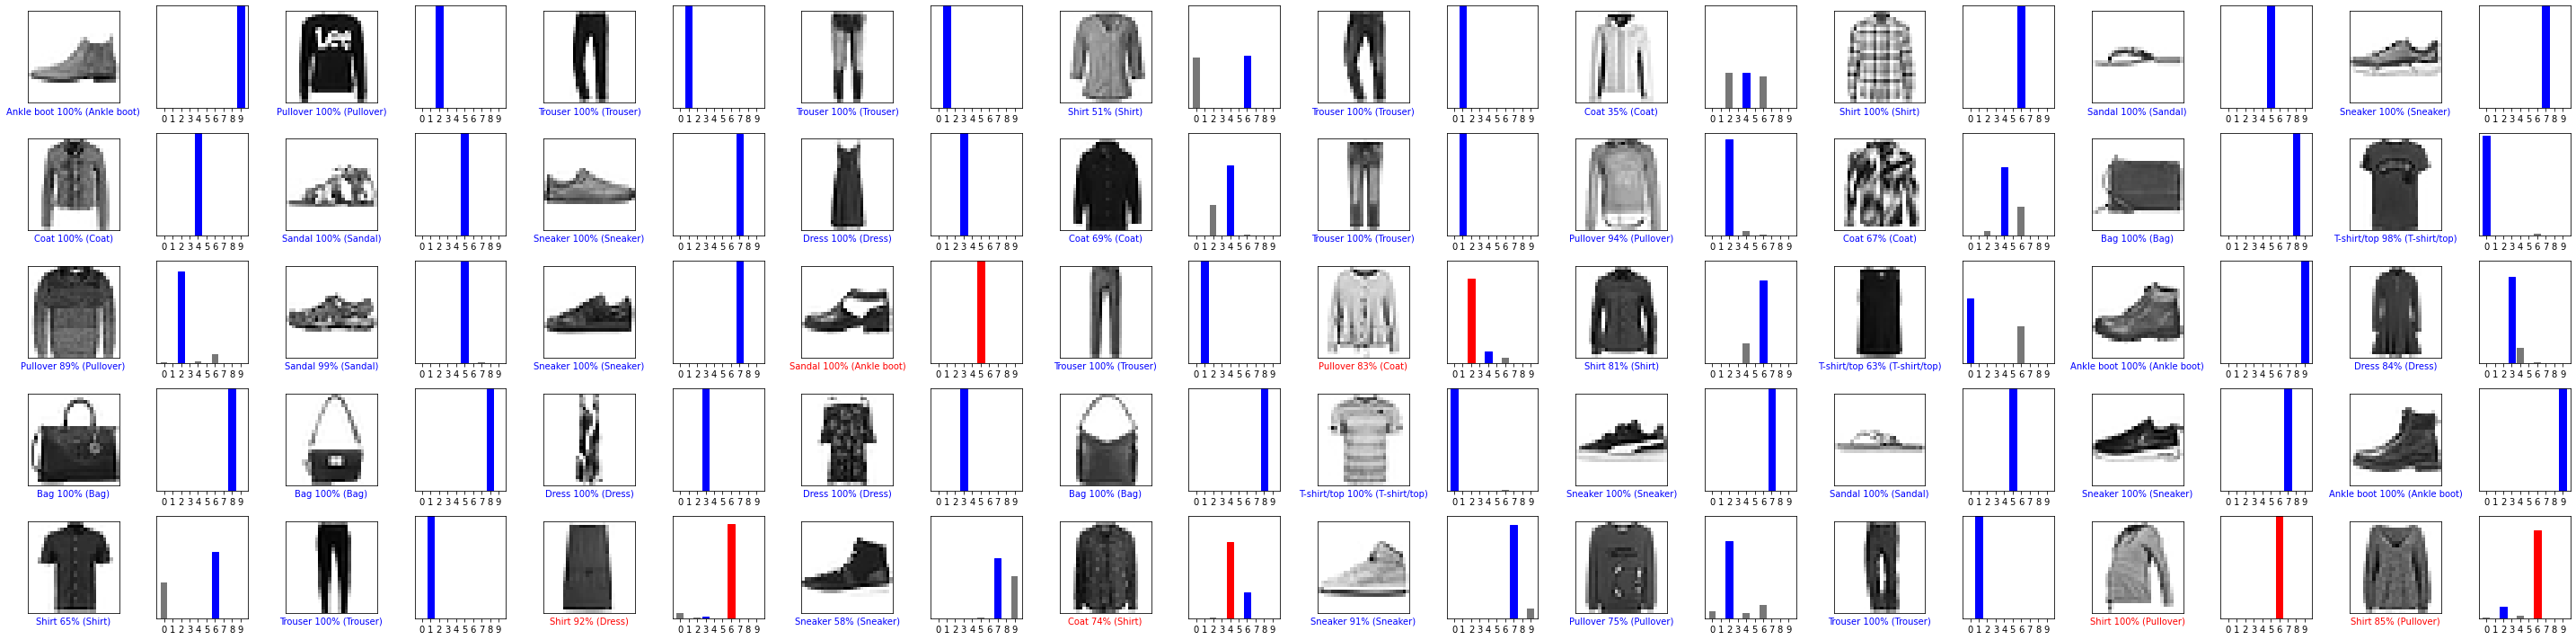

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()